## LOADING THE DATA FROM ZIP-FILE

In [ ]:
import zipfile
zippath = "/content/archive (5).zip"
extractpath = "data"

with zipfile.ZipFile(zippath,"r") as zip_ref:
  zip_ref.extractall(extractpath)

print("ZIP_EXTRACTED SUCCESFULLY")

ZIP_EXTRACTED SUCCESFULLY


In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

## DATA-AUGMENTATION AND PREPROCESSING

In [ ]:
train_tranform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

])

val_and_test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

print("SUCCESSFULLY COMPLETED TRANSFORMATION DEFINITION")


SUCCESSFULLY COMPLETED TRANSFORMATION DEFINITION


## LOADING THE DATA USING PYTORCH

In [ ]:
DATASET_ROOT = "/content/data/Face Mask Dataset"

train_dataset = ImageFolder(
    root = f"{DATASET_ROOT}/Train",
    transform = train_tranform
)

val_dataset = ImageFolder(
    root = f"{DATASET_ROOT}/Validation",
    transform = val_and_test_transforms
)

test_dataset = ImageFolder(
    root = f"{DATASET_ROOT}/Test",
    transform = val_and_test_transforms
)

print("TRANSFORMATIONS APPLIED SUCCESSFULLY")

TRANSFORMATIONS APPLIED SUCCESSFULLY


In [ ]:
train_loader = DataLoader(
    train_dataset,
    batch_size = 32,
    shuffle = True,
    num_workers = 4,
    pin_memory = True
)

val_loader = DataLoader(
    val_dataset,
    batch_size = 32,
    shuffle = False,
    num_workers = 4,
    pin_memory = True
)
test_loader = DataLoader(
    test_dataset,
    batch_size = 32,
    shuffle = False,
    num_workers = 4,
    pin_memory = True
)

print("DATA-LOADERS CREATED SUCCESSFULLY")

DATA-LOADERS CREATED SUCCESSFULLY


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
print("Classes:", train_dataset.classes)
print("Class to index:", train_dataset.class_to_idx)

images, labels = next(iter(train_loader))
print(images.shape)  # [B, 3, 224, 224]
print(labels[:10])


Classes: ['WithMask', 'WithoutMask']
Class to index: {'WithMask': 0, 'WithoutMask': 1}
torch.Size([32, 3, 224, 224])
tensor([1, 0, 0, 0, 0, 1, 1, 1, 0, 0])


In [ ]:
import torch
images = []
labels = []

for i in range(16):
  img,label = train_dataset[i]
  images.append(img)
  labels.append(label)

images = torch.stack(images)

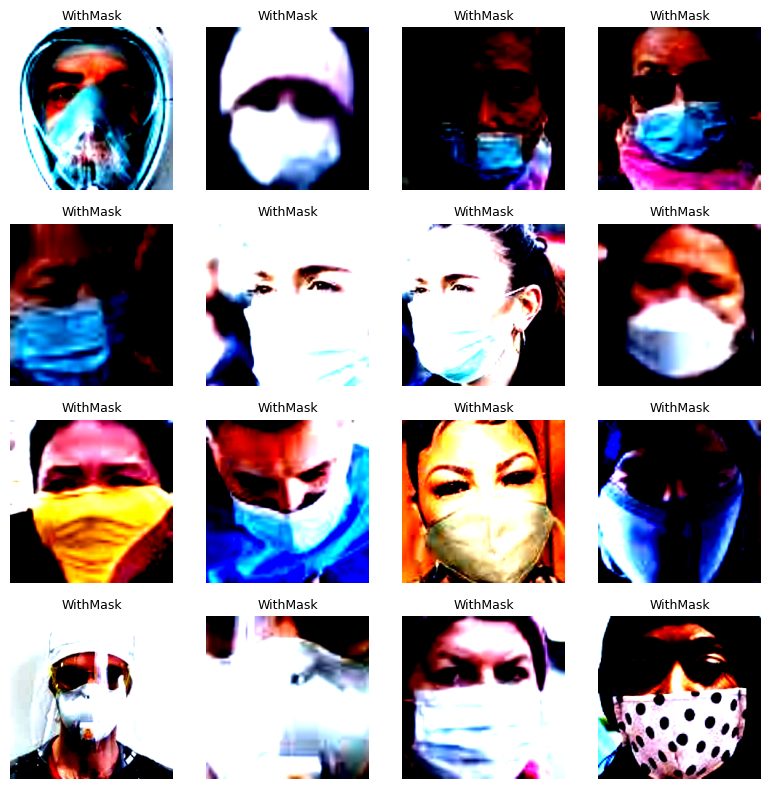

In [ ]:
import matplotlib.pyplot as plt
class_names = train_dataset.classes

plt.figure(figsize=(8, 8))
for i in range(16):
    img, lbl = train_dataset[i]
    plt.subplot(4, 4, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[lbl], fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
print(images[0])

tensor([[[1.3755, 1.3755, 1.3755,  ..., 1.9749, 1.9749, 1.9749],
         [1.3755, 1.3755, 1.3755,  ..., 1.9749, 1.9749, 1.9749],
         [1.3413, 1.3413, 1.3413,  ..., 1.9749, 1.9749, 1.9749],
         ...,
         [0.4851, 0.4851, 0.4851,  ..., 1.9064, 1.9064, 1.9064],
         [0.4851, 0.4851, 0.4851,  ..., 1.9064, 1.9064, 1.9064],
         [0.4851, 0.4851, 0.4851,  ..., 1.9064, 1.9064, 1.9064]],

        [[1.4482, 1.4482, 1.4482,  ..., 2.1310, 2.1310, 2.1310],
         [1.4482, 1.4482, 1.4482,  ..., 2.1310, 2.1310, 2.1310],
         [1.4132, 1.4132, 1.4132,  ..., 2.1310, 2.1310, 2.1310],
         ...,
         [0.6429, 0.6429, 0.6429,  ..., 2.0784, 2.0784, 2.0784],
         [0.6429, 0.6429, 0.6429,  ..., 2.0784, 2.0784, 2.0784],
         [0.6429, 0.6429, 0.6429,  ..., 2.0784, 2.0784, 2.0784]],

        [[1.5594, 1.5594, 1.5594,  ..., 2.3088, 2.3088, 2.3088],
         [1.5594, 1.5594, 1.5594,  ..., 2.3088, 2.3088, 2.3088],
         [1.5245, 1.5245, 1.5245,  ..., 2.3088, 2.3088, 2.

In [ ]:
import torch.nn as nn
from torchvision import models

## LOADING THE PRE-TRAINED MODEL

In [ ]:
model = models.mobilenet_v2(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


This line of code, for param in models.features.parameters(): param.requires_grad = False, is crucial for transfer learning when using a pre-trained model like MobileNetV2.

models.features.parameters(): This part refers to all the learnable parameters (weights and biases) within the feature extraction layers of your pre-trained MobileNetV2 model. When you loaded mobilenet_v2(pretrained=True), the model came with weights already learned from a very large dataset (ImageNet).

param.requires_grad = False: This sets the requires_grad attribute of each parameter in the feature extraction layers to False. In PyTorch, requires_grad=True means that PyTorch will compute gradients for that parameter during backpropagation, allowing it to be updated during training. By setting it to False, you are effectively freezing these layers.

Prevents Overfitting: The pre-trained model has learned powerful features from a massive dataset. For a new, smaller dataset (like your face mask dataset), training all parameters from scratch could lead to overfitting, where the model memorizes the training data instead of learning generalizable features.


Faster Training: By freezing the initial layers, you significantly reduce the number of parameters that need to be updated during training. This makes the training process much faster, as fewer gradients need to be computed and applied.
Leverages Pre-trained Knowledge: This technique allows your model to leverage the rich, general-purpose feature representations already learned by the pre-trained model (e.g., edges, textures, shapes). You then only train the later layers (which you'll likely replace or modify) to adapt these features specifically to your new task (face mask detection).

In [ ]:
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
model.classifier[1] = nn.Linear(
   in_features = model.classifier[1].in_features,
   out_features = 2
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(model.classifier.parameters(),lr=1e-3)

In [ ]:
num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

print("Starting training and validation loop...")

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')

    # --- Training Phase ---
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_train_samples = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_train_samples += images.size(0)

    epoch_train_loss = running_loss / total_train_samples
    epoch_train_accuracy = correct_predictions / total_train_samples
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # --- Validation Phase ---
    model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    total_val_samples = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            total_val_samples += images.size(0)

    epoch_val_loss = val_running_loss / total_val_samples
    epoch_val_accuracy = val_correct_predictions / total_val_samples
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    # Print epoch results
    print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.4f}')

print("Training and validation loop completed.")

Starting training and validation loop...
Epoch 1/10
Train Loss: 0.0913, Train Acc: 0.9683, Val Loss: 0.0373, Val Acc: 0.9888
Epoch 2/10
Train Loss: 0.0371, Train Acc: 0.9882, Val Loss: 0.0124, Val Acc: 0.9975
Epoch 3/10
Train Loss: 0.0380, Train Acc: 0.9869, Val Loss: 0.0154, Val Acc: 0.9962
Epoch 4/10
Train Loss: 0.0291, Train Acc: 0.9901, Val Loss: 0.0179, Val Acc: 0.9938
Epoch 5/10
Train Loss: 0.0301, Train Acc: 0.9879, Val Loss: 0.0090, Val Acc: 0.9975
Epoch 6/10
Train Loss: 0.0319, Train Acc: 0.9892, Val Loss: 0.0106, Val Acc: 0.9962
Epoch 7/10
Train Loss: 0.0356, Train Acc: 0.9860, Val Loss: 0.0163, Val Acc: 0.9925
Epoch 8/10
Train Loss: 0.0282, Train Acc: 0.9903, Val Loss: 0.0083, Val Acc: 0.9962
Epoch 9/10
Train Loss: 0.0248, Train Acc: 0.9898, Val Loss: 0.0074, Val Acc: 0.9975
Epoch 10/10
Train Loss: 0.0289, Train Acc: 0.9900, Val Loss: 0.0108, Val Acc: 0.9950
Training and validation loop completed.


In [ ]:
model.eval()
test_correct_predictions = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Perform forward pass and calculate predictions
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct predictions
        test_total += labels.size(0)
        test_correct_predictions += (predicted == labels).sum().item()

# Calculate and print test accuracy
test_accuracy = test_correct_predictions / test_total
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9970


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Re-run evaluation to collect all predictions and true labels
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Get class names from the dataset
class_names = test_dataset.classes

# Calculate and print classification report
print("Classification Report:")
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Calculate and print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(all_labels, all_predictions))


Classification Report:
              precision    recall  f1-score   support

    WithMask       1.00      1.00      1.00       483
 WithoutMask       1.00      1.00      1.00       509

    accuracy                           1.00       992
   macro avg       1.00      1.00      1.00       992
weighted avg       1.00      1.00      1.00       992


Confusion Matrix:
[[481   2]
 [  1 508]]


In [ ]:
torch.save(model.state_dict(), 'face_mask_model.pth')
print("Model saved successfully as face_mask_model.pth")

Model saved successfully as face_mask_model.pth


In [ ]:
print('The integrated training and validation loop is functional and displayed progress per epoch successfully.')

The integrated training and validation loop is functional and displayed progress per epoch successfully.
